In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics


# Importing the dataset

In [2]:
df=pd.read_csv("kc_house_data.csv",encoding="ISO-8859-1")

In [3]:
print(df.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

# General Informations

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Preprocessing

In [5]:
print(df.isnull().sum().sum())

0


#  Data Visualization 

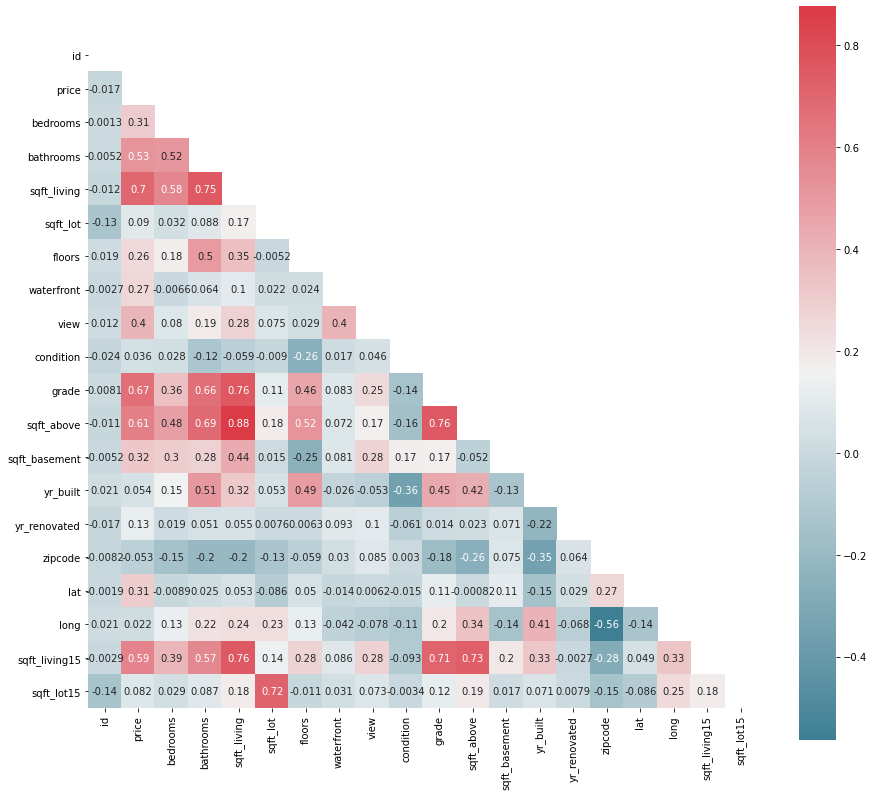

In [6]:
def plot_correlation_map( df ):


    corr=df.corr()
    s , ax = plt.subplots( figsize =( 15 , 15 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    
    mask = np.triu(np.ones_like(corr, dtype=bool))

    s = sns.heatmap(

        corr, 

        cmap = cmap,
        
        mask=mask, 

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 10 }

        )
plot_correlation_map(df)

In [7]:
df.drop('id', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

# Distribution of Prices

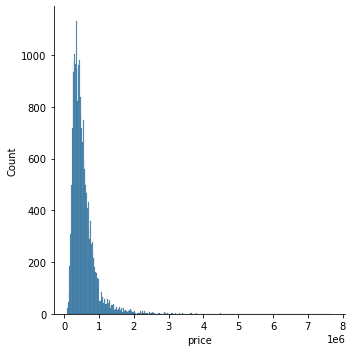

In [8]:
sns.displot(df["price"])

<AxesSubplot:xlabel='long', ylabel='lat'>

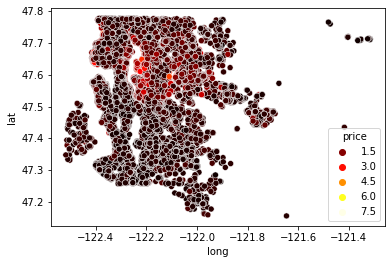

In [9]:
sns.scatterplot(x = "long", y = "lat", data = df, hue = "price",palette='hot')

We can see that all the houses are located in the same area. However the most expensive ones are located in the north.

Text(0.5, 1.0, 'Price vs Grade')

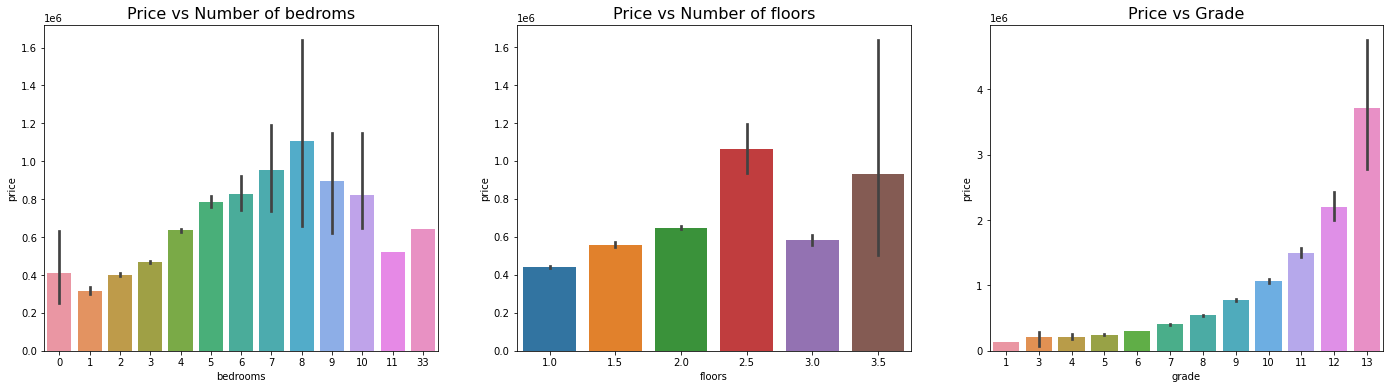

In [10]:
f, axes = plt.subplots(ncols=3, figsize=(24,6))
sns.barplot(y='price',x='bedrooms',data=df,ax=axes[0])
axes[0].set_title('Price vs Number of bedroms', fontsize = 16)
sns.barplot(y='price',x='floors',data=df,ax=axes[1])
axes[1].set_title('Price vs Number of floors', fontsize = 16)
sns.barplot(y='price',x='grade',data=df,ax=axes[2])
axes[2].set_title('Price vs Grade', fontsize = 16)

The most expensive houses are 13th grade houses with 8 bedrooms and 2.5 floors 

Text(0.5, 1.0, 'Price vs Basement')

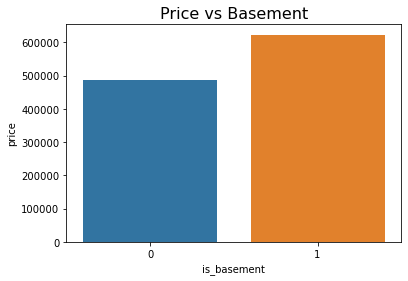

In [11]:
df["is_basement"] = df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
basement_df = df[["is_basement", "price"]].groupby(by = "is_basement", as_index = False)
basement_df = basement_df.mean()
bar=sns.barplot(x = "is_basement", y = "price", data = basement_df)
bar.set_title("Price vs Basement", fontsize = 16)

Houses with basements are more expensive than those without them

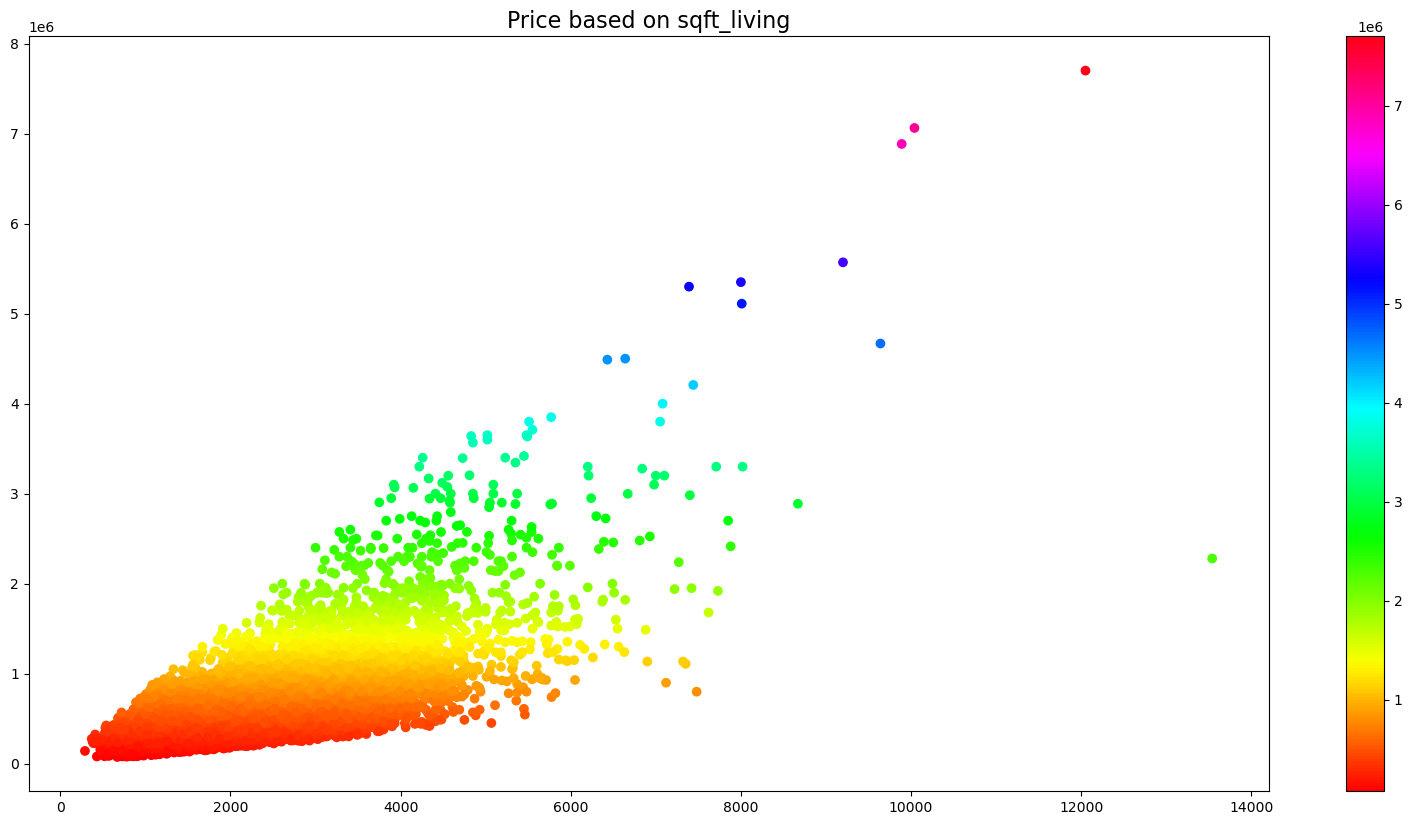

In [12]:
x = df['sqft_living']
y =  df['price']
plt.rcParams.update({'figure.figsize':(20,10), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='hsv')
plt.colorbar()
plt.title("Price based on sqft_living",fontsize = 16)
plt.show()

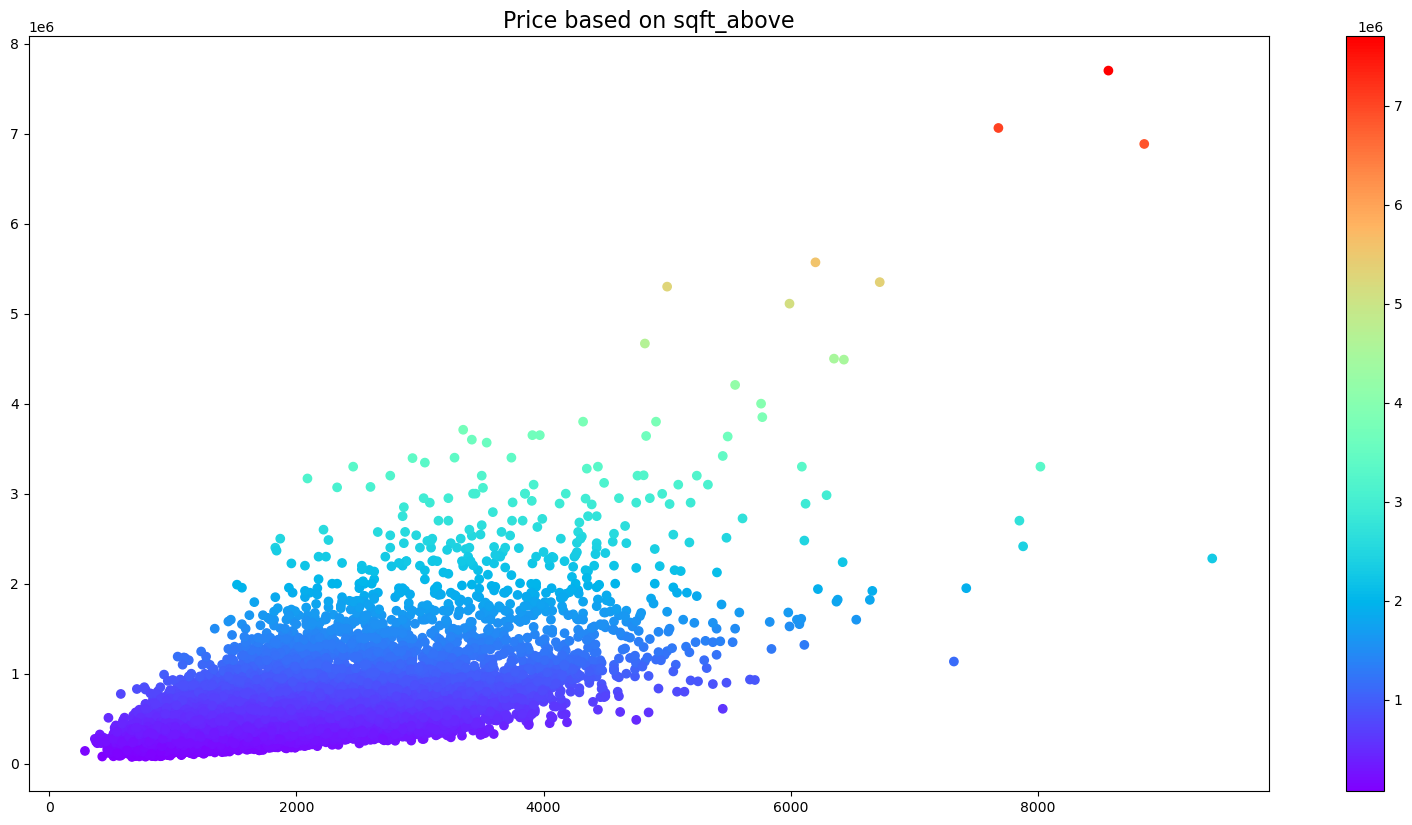

In [13]:
x = df['sqft_above']
y =  df['price']
plt.rcParams.update({'figure.figsize':(20,10), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='rainbow')
plt.colorbar()
plt.title("Price based on sqft_above",fontsize = 16)
plt.show()

Text(0.5, 1.0, 'Influence of waterfront on the price')

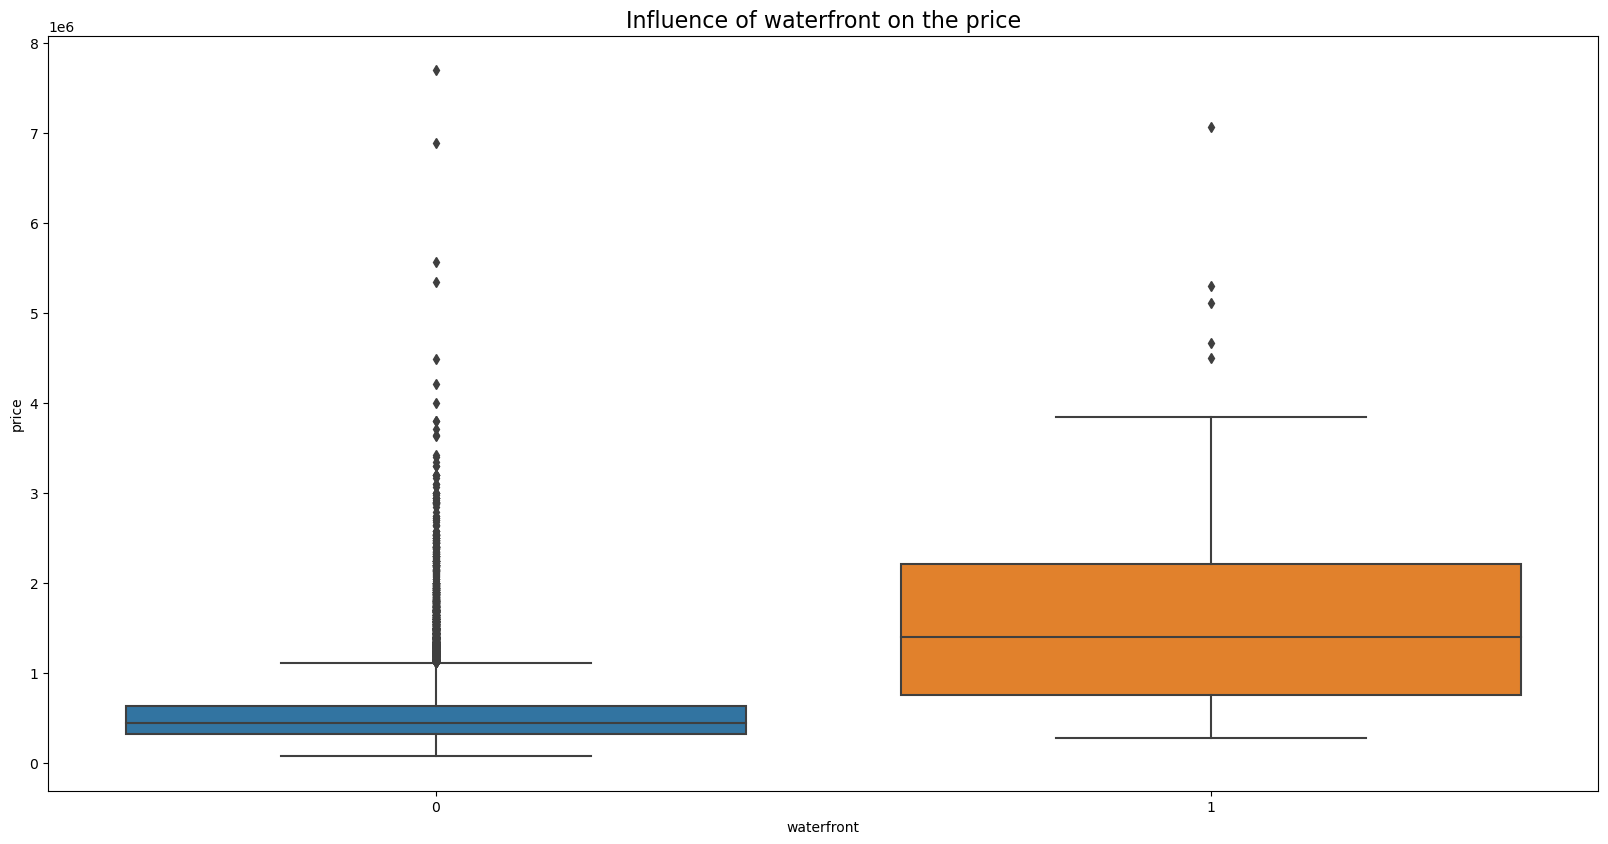

In [14]:
ax=sns.boxplot(x= "waterfront", y= "price", data = df)
ax.set_title("Influence of waterfront on the price",fontsize = 16)

Houses with waterfront are much more expensive than those without it 

Text(0.5, 1.0, 'Price vs Number of bathrooms')

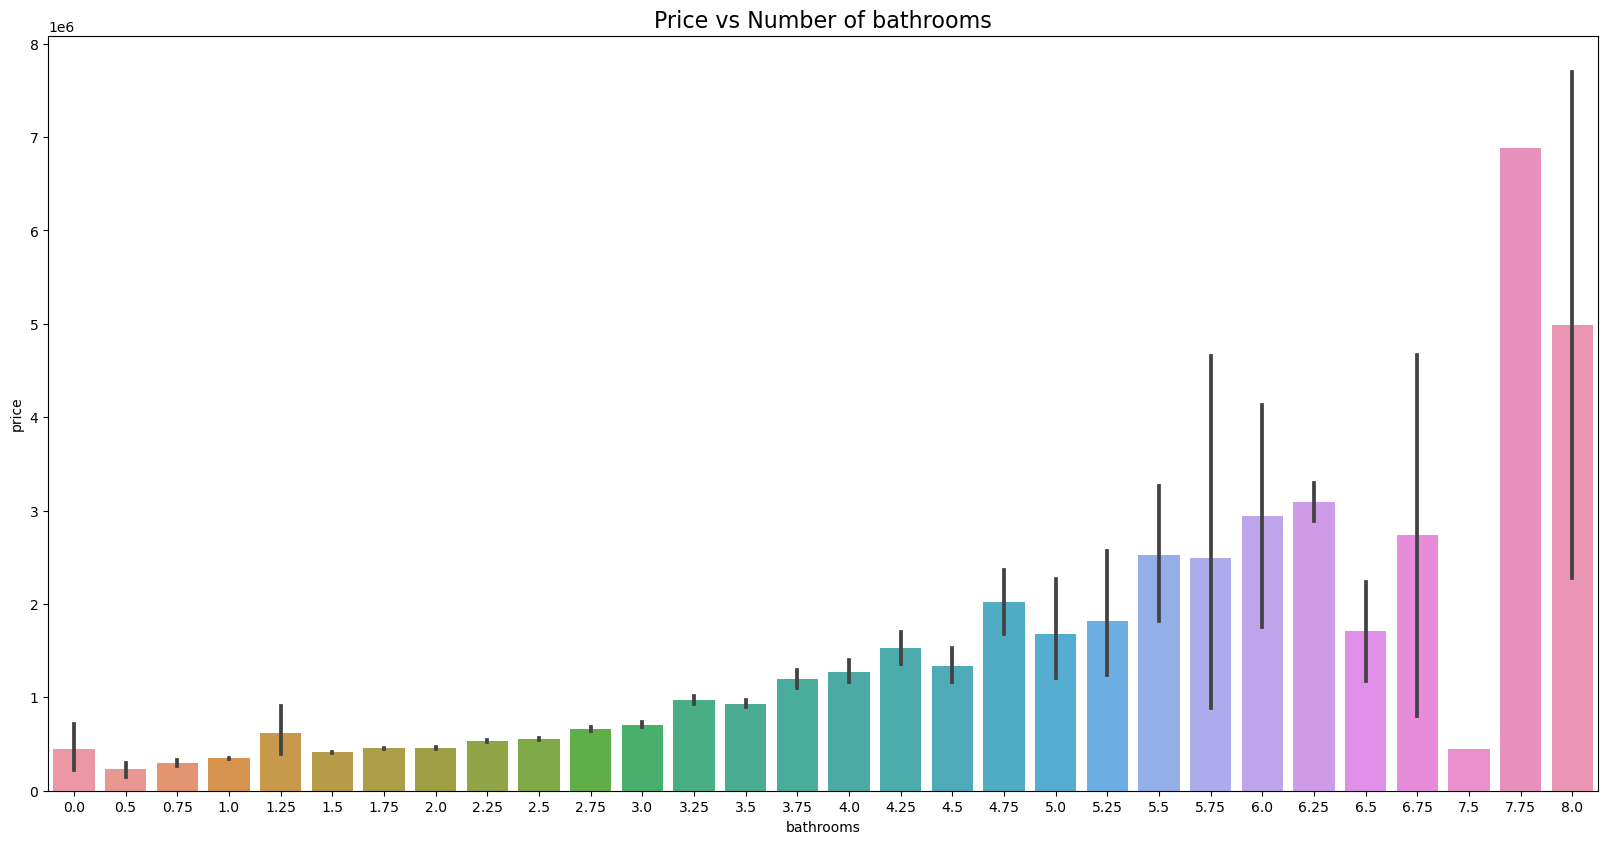

In [15]:
pl=sns.barplot(y='price',x='bathrooms',data=df)
pl.set_title('Price vs Number of bathrooms', fontsize = 16)

Most expensive houses are those with 7.75 bathrooms

# Feature selection

In [16]:
features=['waterfront','sqft_above','sqft_basement','sqft_living15','sqft_living','bedrooms','bathrooms','floors','grade','lat','view']

# Linear regression

In [17]:
x=df["sqft_living"].values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40) 

model=LinearRegression()   
model.fit(x_train,y_train)  
predicted=model.predict(x_test) 


print("MSE: ", mean_squared_error(y_test,predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  62451720102.954
R squared:  0.5035535751151091


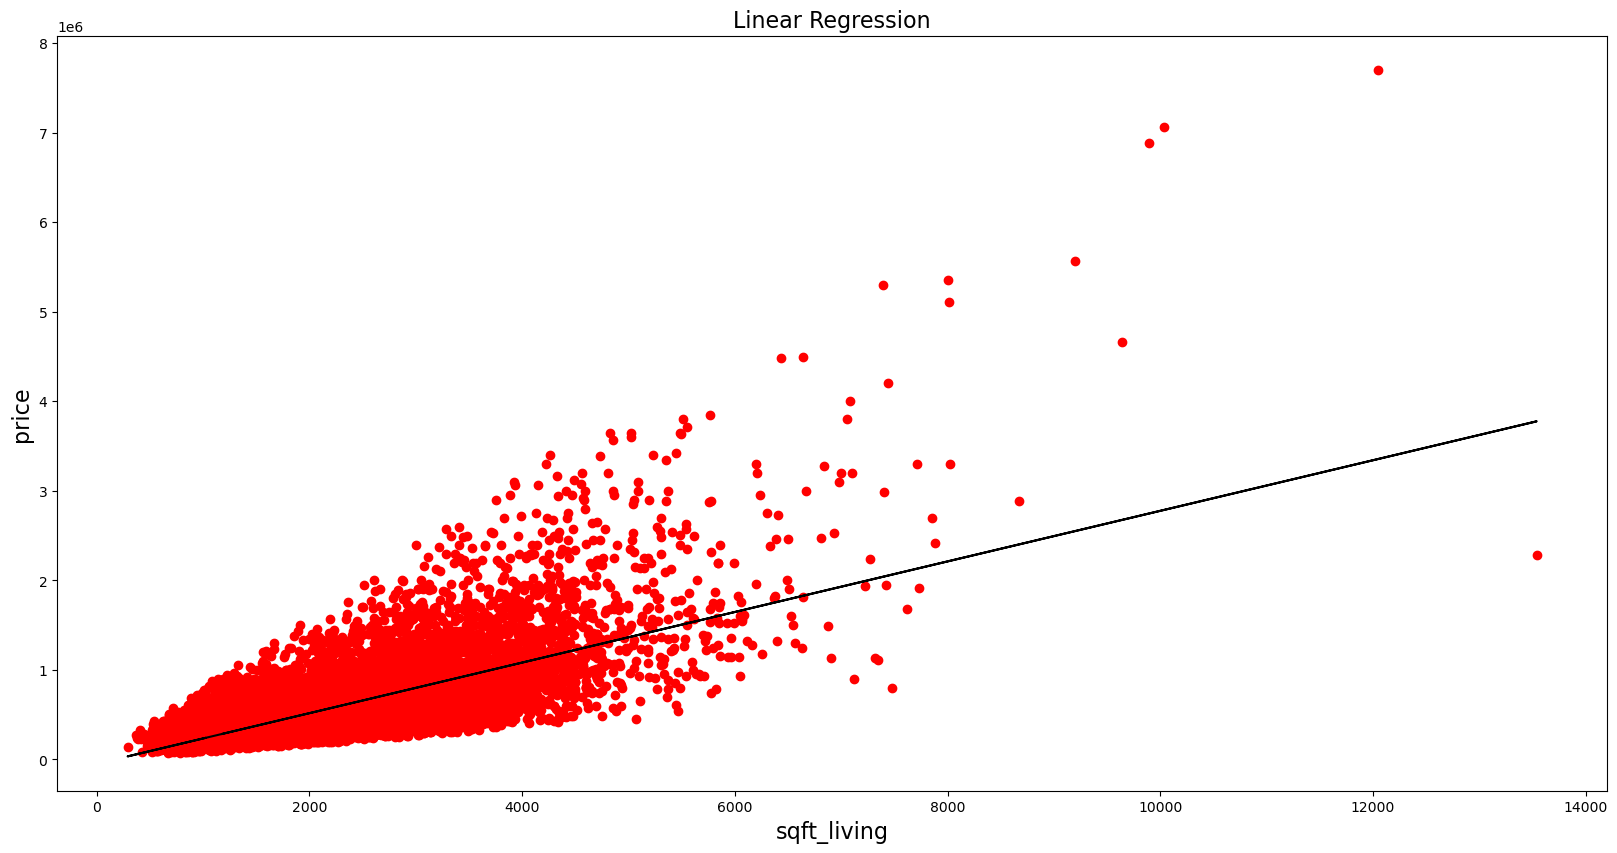

In [18]:
x=df["sqft_living"].values[:,np.newaxis]
y=df["price"].values
plt.scatter(x,y,color="r")
plt.title("Linear Regression", fontsize = 16)
plt.ylabel("price", fontsize = 16)
plt.xlabel("sqft_living", fontsize = 16)
plt.plot(x,model.predict(x),color="k")
plt.show()

In [19]:
x=df["sqft_above"].values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40) 

model=LinearRegression()   
model.fit(x_train,y_train)  
predicted=model.predict(x_test) 


print("MSE: ", mean_squared_error(y_test,predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  78645081812.31802
R squared:  0.37482795291881355


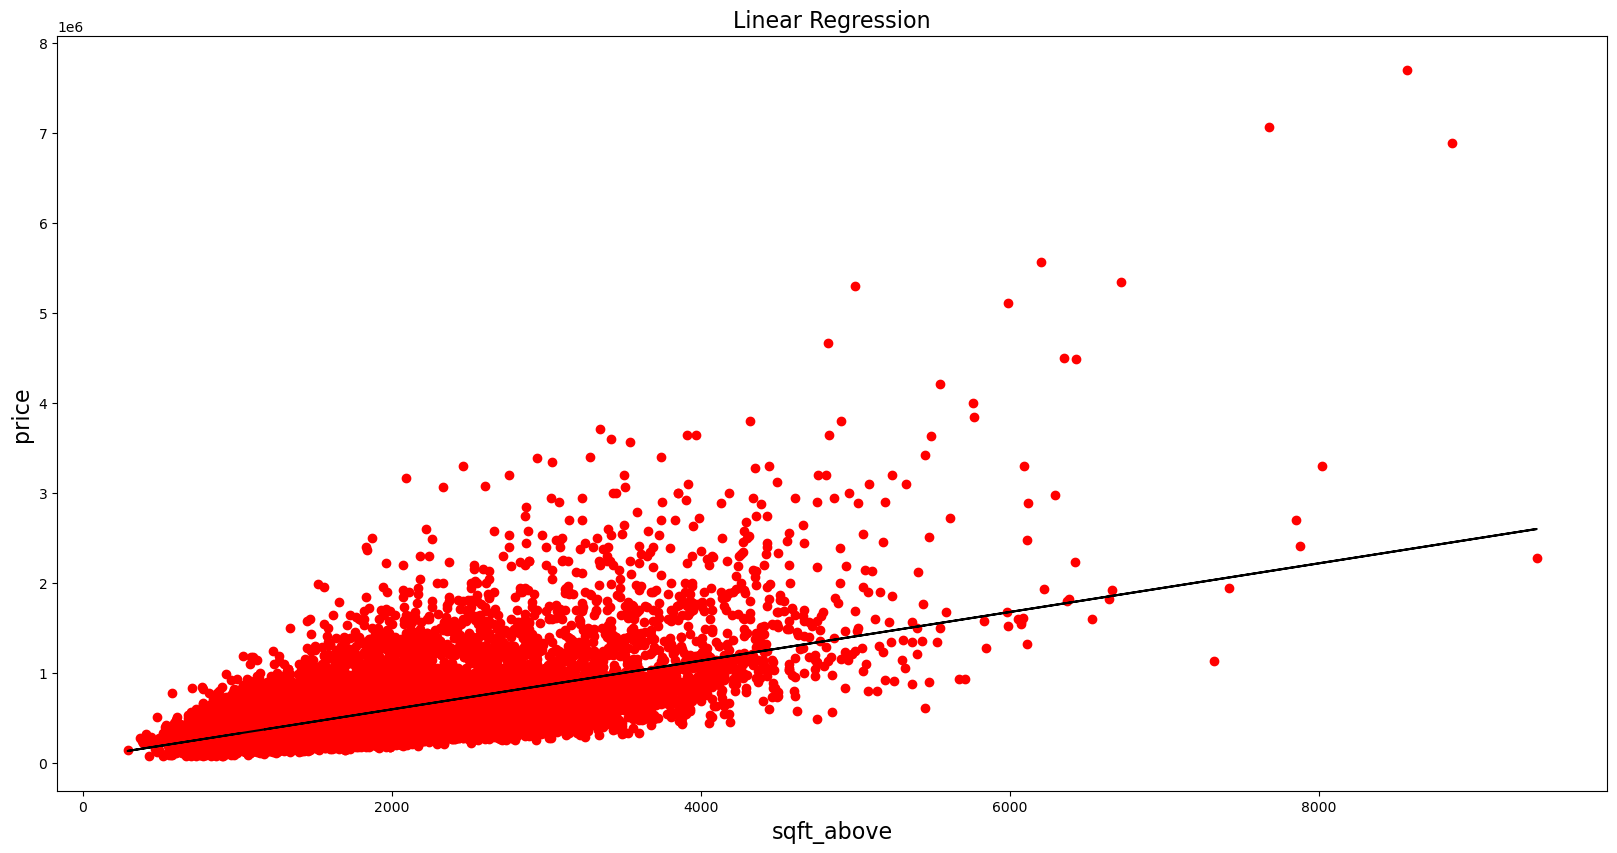

In [20]:
x=df["sqft_above"].values[:,np.newaxis]
y=df["price"].values
plt.scatter(x,y,color="r")
plt.title("Linear Regression", fontsize = 16)
plt.ylabel("price", fontsize = 16)
plt.xlabel("sqft_above", fontsize = 16)
plt.plot(x,model.predict(x),color="k")
plt.show()

In [21]:
x=df[features]
x.head()

,waterfront,sqft_above,sqft_basement,sqft_living15,sqft_living,bedrooms,bathrooms,floors,grade,lat,view
0,0,1180,0,1340,1180,3,1.00,1.0,7,47.5112,0
1,0,2170,400,1690,2570,3,2.25,2.0,7,47.7210,0
2,0,770,0,2720,770,2,1.00,1.0,6,47.7379,0
3,0,1050,910,1360,1960,4,3.00,1.0,7,47.5208,0
4,0,1680,0,1800,1680,3,2.00,1.0,8,47.6168,0


# Multi-linear regression

In [22]:
y=df['price']
x=df[features]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40) 
my_linear = LinearRegression()
my_linear.fit(x_train,y_train) 
predicted=my_linear.predict(x_test) 
print("MSE: ", mean_squared_error(y_test,predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  43209690608.20221
R squared:  0.6565139216748399


# Polynomial regression 

In [33]:
y=df['price']
x=df[features]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40) 
lg=LinearRegression()
poly=PolynomialFeatures(degree=4)

x_train_fit = poly.fit_transform(x_train) 
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  116298434705.10526
R squared:  0.07551077802375095
